In [56]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("X_Magazasi_Musteri_Verisi.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  object        
 1   gender                   10000 non-null  object        
 2   birth_date               10000 non-null  datetime64[ns]
 3   registration_date        10000 non-null  datetime64[ns]
 4   last_purchase_date       10000 non-null  datetime64[ns]
 5   total_spent              10000 non-null  float64       
 6   transaction_count        10000 non-null  int64         
 7   avg_basket_size          10000 non-null  float64       
 8   favorite_category        10000 non-null  object        
 9   has_loyalty_card         10000 non-null  object        
 10  online_transaction_rate  10000 non-null  float64       
 11  responded_to_campaign    10000 non-null  object        
 12  returned_items_count     10000 no

,customer_id,gender,birth_date,registration_date,last_purchase_date,total_spent,transaction_count,avg_basket_size,favorite_category,has_loyalty_card,online_transaction_rate,responded_to_campaign,returned_items_count
0,CUST00001,Erkek,1993-07-31,2020-06-05,2025-05-17,3066.32,25,91.44,Erkek Giyim,Hayır,0.21,Evet,1
1,CUST00002,Erkek,1984-07-20,2022-05-06,2025-05-17,3745.25,24,386.86,Çocuk Giyim,Evet,0.46,Hayır,1
2,CUST00003,Erkek,1964-06-27,2021-02-18,2025-05-17,4336.48,13,402.41,Aksesuar,Hayır,0.09,Hayır,5
3,CUST00004,Kadın,1987-07-22,2021-05-24,2025-05-17,3384.56,3,219.85,Erkek Giyim,Evet,0.38,Hayır,3
4,CUST00005,Kadın,1990-03-08,2021-06-24,2025-05-17,2734.40,16,371.76,Ayakkabı,Hayır,0.21,Hayır,1


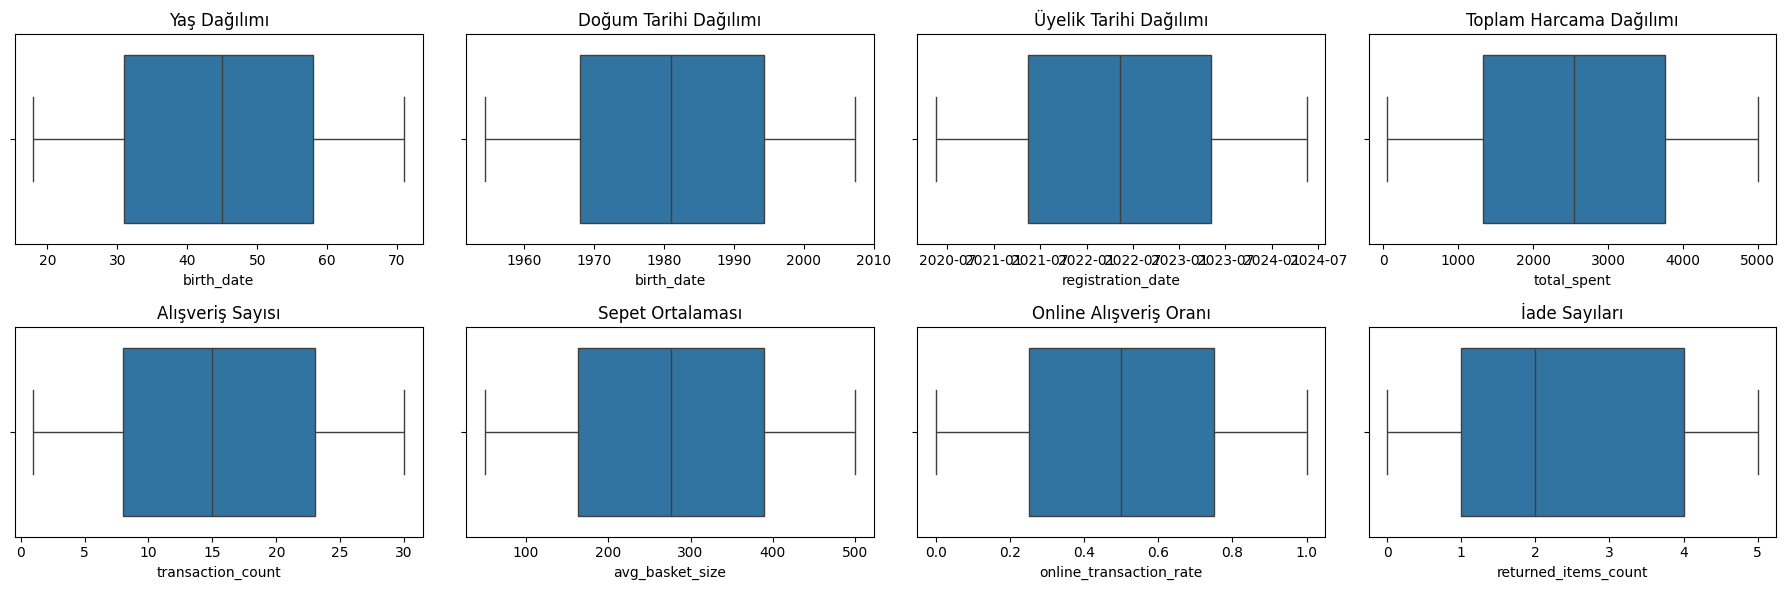

In [25]:
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"])
df["registration_date"] = pd.to_datetime(df["registration_date"])
df["birth_date"] = pd.to_datetime(df["birth_date"])

#  2 satır, 4 sütun, şekil boyutu
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

today = dt.date.today()

sns.boxplot(x=today.year - df['birth_date'].dt.year, ax=axes[0,0])
axes[0,0].set_title("Yaş Dağılımı")

sns.boxplot(x=df["birth_date"], ax=axes[0,1])
axes[0,1].set_title("Doğum Tarihi Dağılımı")

sns.boxplot(x=df["registration_date"], ax=axes[0,2])
axes[0,2].set_title("Üyelik Tarihi Dağılımı")

sns.boxplot(x=df["total_spent"], ax=axes[0,3])
axes[0,3].set_title("Toplam Harcama Dağılımı")

sns.boxplot(x=df["transaction_count"], ax=axes[1,0])
axes[1,0].set_title("Alışveriş Sayısı")

sns.boxplot(x=df["avg_basket_size"], ax=axes[1,1])
axes[1,1].set_title("Sepet Ortalaması")

sns.boxplot(x=df["online_transaction_rate"], ax=axes[1,2])
axes[1,2].set_title("Online Alışveriş Oranı")

sns.boxplot(x=df["returned_items_count"], ax=axes[1,3])
axes[1,3].set_title("İade Sayıları")


plt.tight_layout()
plt.show()

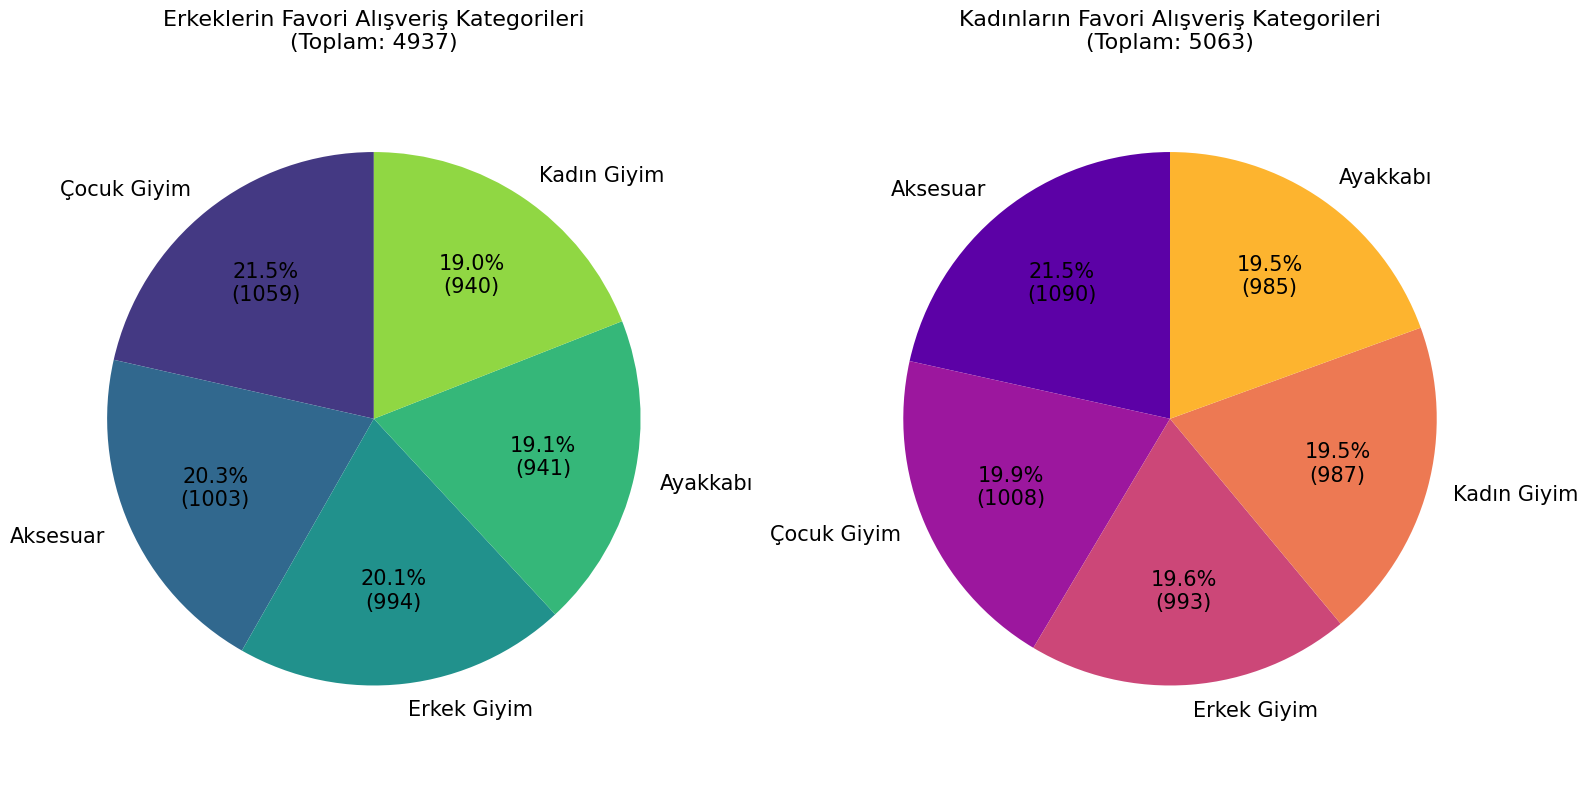


--- Müşteri Sayısına Göre En Çok Tercih Edilen Kategoriler ---
Erkeklerde En Çok Tercih Edilen: Çocuk Giyim (1059 müşteri)
Kadınlarda En Çok Tercih Edilen: Aksesuar (1090 müşteri)


In [61]:
df_cleaned = df.copy()
# Cinsiyete göre filtrele
erkek_musteriler = df_cleaned[df_cleaned['gender'] == 'Erkek']
kadin_musteriler = df_cleaned[df_cleaned['gender'] == 'Kadın']

# --- Müşteri Sayısına Göre Dağılım (Pasta Grafiği) ---
erkek_favori_kategori_sayilari = erkek_musteriler['favorite_category'].value_counts()
kadin_favori_kategori_sayilari = kadin_musteriler['favorite_category'].value_counts()

# Pasta grafiği
fig1, axes1 = plt.subplots(1, 2, figsize=(16, 8))

# Yazı boyutunu ayarlamak için
textprops = {'fontsize': 15}

# Erkeklerin Favori Kategorileri Pasta Grafiği
total_erkek_sayi = len(erkek_musteriler)
axes1[0].pie(erkek_favori_kategori_sayilari, labels=erkek_favori_kategori_sayilari.index,
              autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(round(pct/100.*total_erkek_sayi))),
              startangle=90, colors=sns.color_palette('viridis', len(erkek_favori_kategori_sayilari)),
              pctdistance=0.65, textprops=textprops) # textprops yazı font yukarıda ayarla
axes1[0].set_title(f'Erkeklerin Favori Alışveriş Kategorileri\n(Toplam: {total_erkek_sayi})', fontsize=16)
axes1[0].axis('equal')

# Kadınların Favori Kategorileri Pasta Grafiği
total_kadin_sayi = len(kadin_musteriler)
axes1[1].pie(kadin_favori_kategori_sayilari, labels=kadin_favori_kategori_sayilari.index,
              autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(round(pct/100.*total_kadin_sayi))),
              startangle=90, colors=sns.color_palette('plasma', len(kadin_favori_kategori_sayilari)),
              pctdistance=0.65, textprops=textprops) # textprops yazı font yukarıda ayarla
axes1[1].set_title(f'Kadınların Favori Alışveriş Kategorileri\n(Toplam: {total_kadin_sayi})', fontsize=16)
axes1[1].axis('equal')
plt.tight_layout()
plt.show()

print("\n--- Müşteri Sayısına Göre En Çok Tercih Edilen Kategoriler ---")
print(f"Erkeklerde En Çok Tercih Edilen: {erkek_favori_kategori_sayilari.index[0]} ({erkek_favori_kategori_sayilari.iloc[0]} müşteri)")
print(f"Kadınlarda En Çok Tercih Edilen: {kadin_favori_kategori_sayilari.index[0]} ({kadin_favori_kategori_sayilari.iloc[0]} müşteri)")

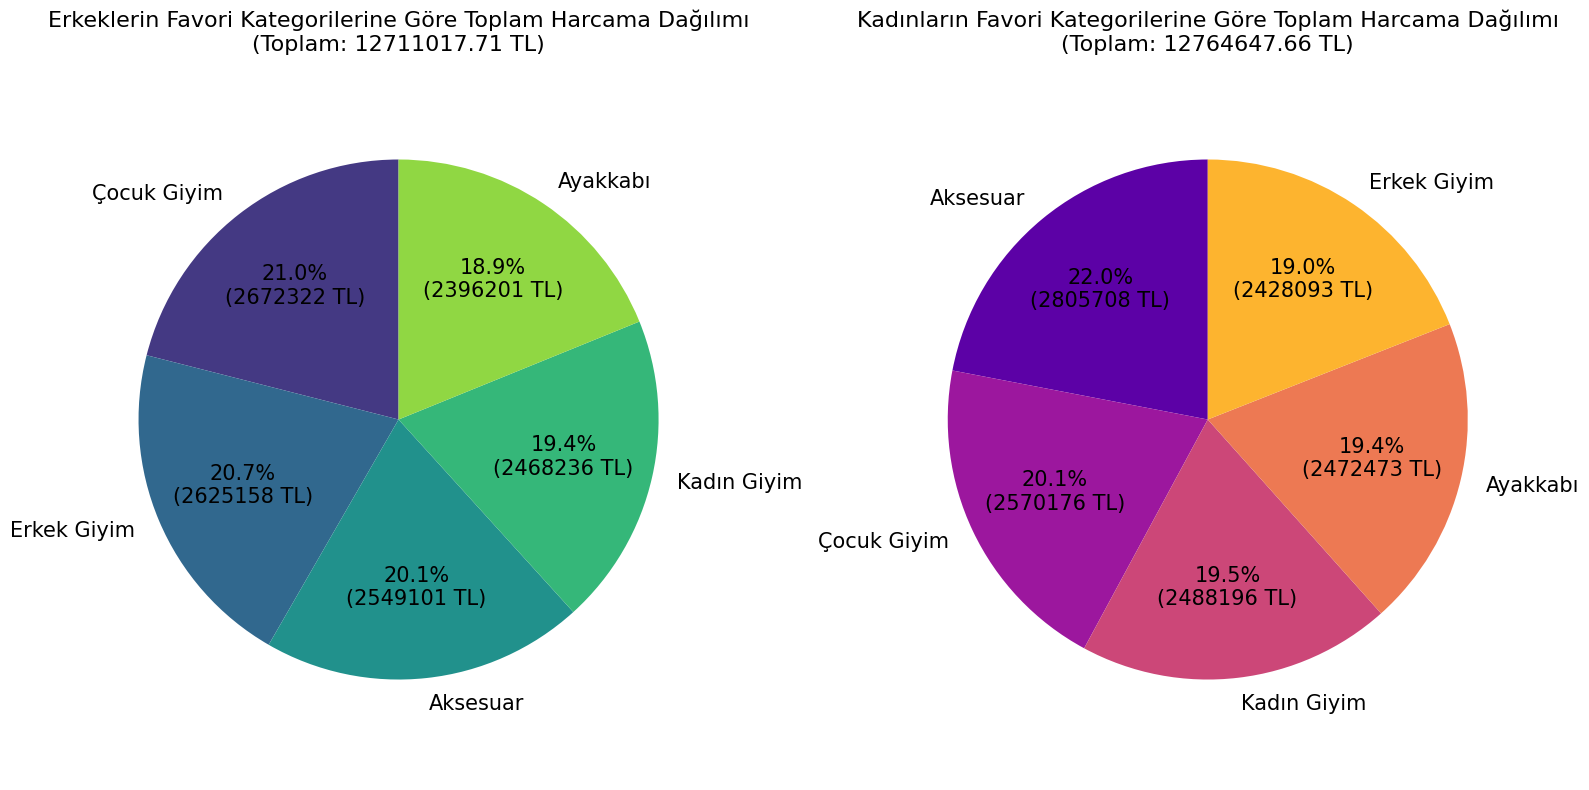


--- Harcama Tutarına Göre En Çok Harcama Yapılan Kategoriler ---
Erkeklerde En Çok Harcama Yapılan: Çocuk Giyim (2672321.66 TL)
Kadınlarda En Çok Harcama Yapılan: Aksesuar (2805708.59 TL)


In [58]:
# --- Harcama Tutarına Göre Dağılım (Pasta Grafiği) ---

erkek_favori_kategori_harcama = erkek_musteriler.groupby('favorite_category')['total_spent'].sum().sort_values(ascending=False)
kadin_favori_kategori_harcama = kadin_musteriler.groupby('favorite_category')['total_spent'].sum().sort_values(ascending=False)

# Pasta grafiği
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 8)) # Yeni bir figure oluştur

#Favori Kategorileri Harcama Tutarı Dağılımı Grafiği
total_erkek_harcama = erkek_favori_kategori_harcama.sum()
axes2[0].pie(erkek_favori_kategori_harcama, labels=erkek_favori_kategori_harcama.index,
              autopct=lambda pct: '{:.1f}%\n({:.0f} TL)'.format(pct, pct/100.*total_erkek_harcama),
              startangle=90, colors=sns.color_palette('viridis', len(erkek_favori_kategori_harcama)),
              pctdistance=0.65, textprops=textprops) # textprops yazı fontu yukarıdan ayarla
axes2[0].set_title(f'Erkeklerin Favori Kategorilerine Göre Toplam Harcama Dağılımı\n(Toplam: {total_erkek_harcama:.2f} TL)', fontsize=16)
axes2[0].axis('equal')

# Kadınların Favori Kategorileri Harcama Tutarı Dağılımı Grafiği
total_kadin_harcama = kadin_favori_kategori_harcama.sum()
axes2[1].pie(kadin_favori_kategori_harcama, labels=kadin_favori_kategori_harcama.index,
              autopct=lambda pct: '{:.1f}%\n({:.0f} TL)'.format(pct, pct/100.*total_kadin_harcama),
              startangle=90, colors=sns.color_palette('plasma', len(kadin_favori_kategori_harcama)),
              pctdistance=0.65, textprops=textprops) # textprops argümanı eklendi
axes2[1].set_title(f'Kadınların Favori Kategorilerine Göre Toplam Harcama Dağılımı\n(Toplam: {total_kadin_harcama:.2f} TL)', fontsize=16)
axes2[1].axis('equal')

plt.tight_layout()
plt.show()

# En çok harcama yapılan kategorileri yazdırma (Harcama Tutarı) - önceki koddan kopyalandı
print("\n--- Harcama Tutarına Göre En Çok Harcama Yapılan Kategoriler ---")
print(f"Erkeklerde En Çok Harcama Yapılan: {erkek_favori_kategori_harcama.index[0]} ({erkek_favori_kategori_harcama.iloc[0]:.2f} TL)")
print(f"Kadınlarda En Çok Harcama Yapılan: {kadin_favori_kategori_harcama.index[0]} ({kadin_favori_kategori_harcama.iloc[0]:.2f} TL)")

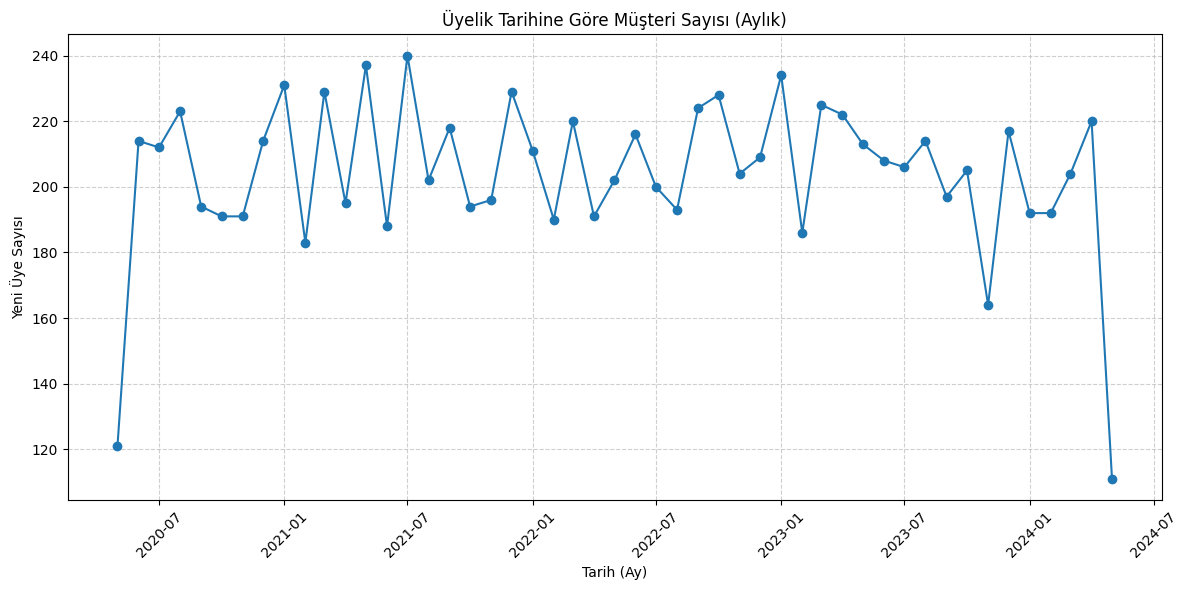


Aylık ortalama yeni müşteri sayısı: 204.08


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df['registration_year_month'] = df['registration_date'].dt.to_period('M')
monthly_registrations = df['registration_year_month'].value_counts().sort_index()
monthly_registrations.index = monthly_registrations.index.to_timestamp()

# Grafik çizme
plt.figure(figsize=(12, 6))
plt.plot(monthly_registrations.index, monthly_registrations.values, marker='o', linestyle='-')
plt.title('Üyelik Tarihine Göre Müşteri Sayısı (Aylık)')
plt.xlabel('Tarih (Ay)')
plt.ylabel('Yeni Üye Sayısı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45) #etiketlerini döndür
plt.tight_layout()
plt.show()

average_monthly_registrations = monthly_registrations.mean()
print(f"\nAylık ortalama yeni müşteri sayısı: {average_monthly_registrations:.2f}")


In [29]:
import pandas as pd
import datetime as dt
import numpy as np
from IPython.display import display

#rfm analizi
latest_date = df['last_purchase_date'].max()
rfm_df = df.copy()
rfm_df['Recency'] = ((latest_date - rfm_df['registration_date']).dt.days)/ rfm_df['transaction_count']
rfm_df['Frequency'] = rfm_df['transaction_count']
rfm_df['Monetary'] = rfm_df['total_spent']

recency_labels = [5, 4, 3, 2, 1]
frequency_labels = [1, 2, 3, 4, 5]
monetary_labels = [1, 2, 3, 4, 5]

rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], 5, labels=recency_labels, duplicates="drop").astype(float).fillna(0).astype(int)
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"], 5, labels=frequency_labels, duplicates="drop").astype(float).fillna(0).astype(int)
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], 5, labels=monetary_labels, duplicates="drop").astype(float).fillna(0).astype(int)
rfm_df["RFM_Score"] = rfm_df["R_Score"].astype(str) + rfm_df["F_Score"].astype(str) + rfm_df["M_Score"].astype(str)

# Churn analizi
rfm_df['Ortalama_AlisVeris'] = ((latest_date - rfm_df['registration_date']).dt.days)/ rfm_df['transaction_count']
rfm_df["Churn"] = rfm_df["Ortalama_AlisVeris"] > 176.7  # normalde burayı 180 yapacaktım fakat rfm analizinde müşteri segmentlerinde zaten 176.7 çıkmış.

# Customer Lifetime Value (LTV) ve Average Order Value (AOV) hesaplama
rfm_df["AOV"] = rfm_df["Monetary"] / rfm_df["Frequency"]
rfm_df["LTV"] = rfm_df["AOV"] * rfm_df["Frequency"]

print("\n## RFM Hesaplama ve Skorlama Sonuçları (İlk 5 satır) ##")
display(rfm_df.head())


## RFM Hesaplama ve Skorlama Sonuçları (İlk 5 satır) ##


,customer_id,gender,birth_date,registration_date,last_purchase_date,total_spent,transaction_count,avg_basket_size,favorite_category,has_loyalty_card,...,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Ortalama_AlisVeris,Churn,AOV,LTV
0,CUST00001,Erkek,1993-07-31,2020-06-05,2025-05-17,3066.32,25,91.44,Erkek Giyim,Hayır,...,25,3066.32,3,5,4,354,72.280000,False,122.652800,3066.32
1,CUST00002,Erkek,1984-07-20,2022-05-06,2025-05-17,3745.25,24,386.86,Çocuk Giyim,Evet,...,24,3745.25,4,4,4,444,46.125000,False,156.052083,3745.25
2,CUST00003,Erkek,1964-06-27,2021-02-18,2025-05-17,4336.48,13,402.41,Aksesuar,Hayır,...,13,4336.48,2,3,5,235,119.153846,False,333.575385,4336.48
3,CUST00004,Kadın,1987-07-22,2021-05-24,2025-05-17,3384.56,3,219.85,Erkek Giyim,Evet,...,3,3384.56,1,1,4,114,484.666667,True,1128.186667,3384.56
4,CUST00005,Kadın,1990-03-08,2021-06-24,2025-05-17,2734.40,16,371.76,Ayakkabı,Hayır,...,16,2734.40,3,3,3,333,88.937500,False,170.900000,2734.40


In [30]:
rfm_count_df = pd.DataFrame({
  'R_Score Adeti':rfm_df['R_Score'].value_counts().sort_index(),
  'F_Score Adeti':rfm_df['F_Score'].value_counts().sort_index(),
  'M_Score Adeti':rfm_df['M_Score'].value_counts().sort_index()
  })
print(rfm_count_df)

   R_Score Adeti  F_Score Adeti  M_Score Adeti
1           1998           2063           2000
2           2002           2068           2000
3           2000           1948           2000
4           2000           1978           2000
5           2000           1943           2000


In [31]:
import pandas as pd

def assign_rfm_segment(rfm_score):

# normalde r,f,m skorlarının büyüklüğüne göre otomatik sıralayabilirdik
# fakat çakışma ve eksik değerlendirme görünce bir defalığına manuel düzelttim.
    if rfm_score == '555':
        return 'Vip Müşteri'
    elif rfm_score in ['433', '434', '435', '443', '444', '445', '453', '454', '455', '523', '524', '525', '533', '534', '535', '543', '544', '545', '553', '554', '555']:
        return 'Çok Aktif'
    elif rfm_score in ['333', '334', '335', '343', '344', '345', '353', '354', '355']:
         return 'Aktif'
    elif rfm_score in ['411', '412', '421', '422', '511', '512', '521', '522']:
         return 'Az aktif'
    elif rfm_score in ['131', '132', '133', '134', '135', '141', '142', '143', '144', '145', '151', '152', '153', '154', '155', '213', '214', '215', '223', '224', '225', '231', '232', '233', '234', '235', '241', '242', '243', '244', '245', '251', '252', '253', '254', '255', '311', '312', '313', '314', '315', '321', '322', '323', '324', '325', '331', '332', '341', '342', '351', '352', '413', '414', '415', '423', '424', '425']: # Düşük/Orta R, Orta/Yüksek F/M skorlu bazıları 'Riskli Müşteriler' veya 'Kaybetmememiz Gerekenler' olabilir
        return 'Uyumak Üzere'
    elif rfm_score in ['111', '112', '113', '114', '115', '121', '122', '123', '124', '125', '211', '212', '221', '222']:
        return 'Kayıp Müşteri'


rfm_df['Segment'] = rfm_df['RFM_Score'].apply(assign_rfm_segment)
display(rfm_df.head())

# excel çıktısı için aşağı kısmı aktif edeceğim
#output_excel_file = "RFM_Segmentasyon_Sonuclari.xlsx"
#rfm_df.to_excel(output_excel_file, index=False)


,customer_id,gender,birth_date,registration_date,last_purchase_date,total_spent,transaction_count,avg_basket_size,favorite_category,has_loyalty_card,...,Monetary,R_Score,F_Score,M_Score,RFM_Score,Ortalama_AlisVeris,Churn,AOV,LTV,Segment
0,CUST00001,Erkek,1993-07-31,2020-06-05,2025-05-17,3066.32,25,91.44,Erkek Giyim,Hayır,...,3066.32,3,5,4,354,72.280000,False,122.652800,3066.32,Aktif
1,CUST00002,Erkek,1984-07-20,2022-05-06,2025-05-17,3745.25,24,386.86,Çocuk Giyim,Evet,...,3745.25,4,4,4,444,46.125000,False,156.052083,3745.25,Çok Aktif
2,CUST00003,Erkek,1964-06-27,2021-02-18,2025-05-17,4336.48,13,402.41,Aksesuar,Hayır,...,4336.48,2,3,5,235,119.153846,False,333.575385,4336.48,Uyumak Üzere
3,CUST00004,Kadın,1987-07-22,2021-05-24,2025-05-17,3384.56,3,219.85,Erkek Giyim,Evet,...,3384.56,1,1,4,114,484.666667,True,1128.186667,3384.56,Kayıp Müşteri
4,CUST00005,Kadın,1990-03-08,2021-06-24,2025-05-17,2734.40,16,371.76,Ayakkabı,Hayır,...,2734.40,3,3,3,333,88.937500,False,170.900000,2734.40,Aktif


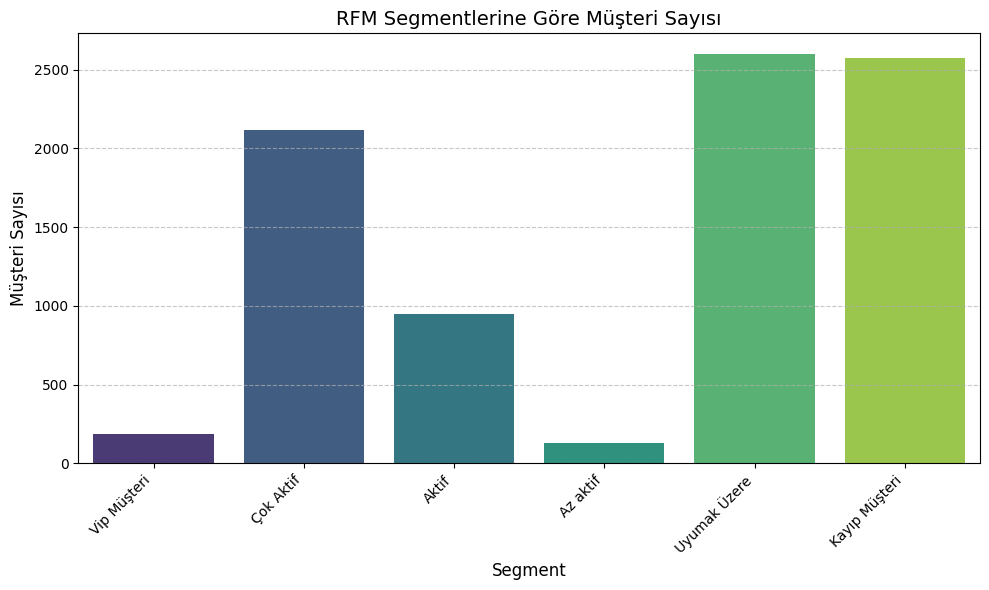

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Segment sırası
segment_sirasi = ['Vip Müşteri', 'Çok Aktif', 'Aktif', 'Az aktif', 'Uyumak Üzere', 'Kayıp Müşteri']

# Segmentlere göre müşteri sayısını hesapla
segment_counts = rfm_df['Segment'].value_counts().reindex(segment_sirasi).reset_index()
segment_counts.columns = ['Segment', 'Musteri_Sayisi']

# Sütun grafiği
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Musteri_Sayisi', hue='Segment', data=segment_counts, palette='viridis')
plt.title('RFM Segmentlerine Göre Müşteri Sayısı', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

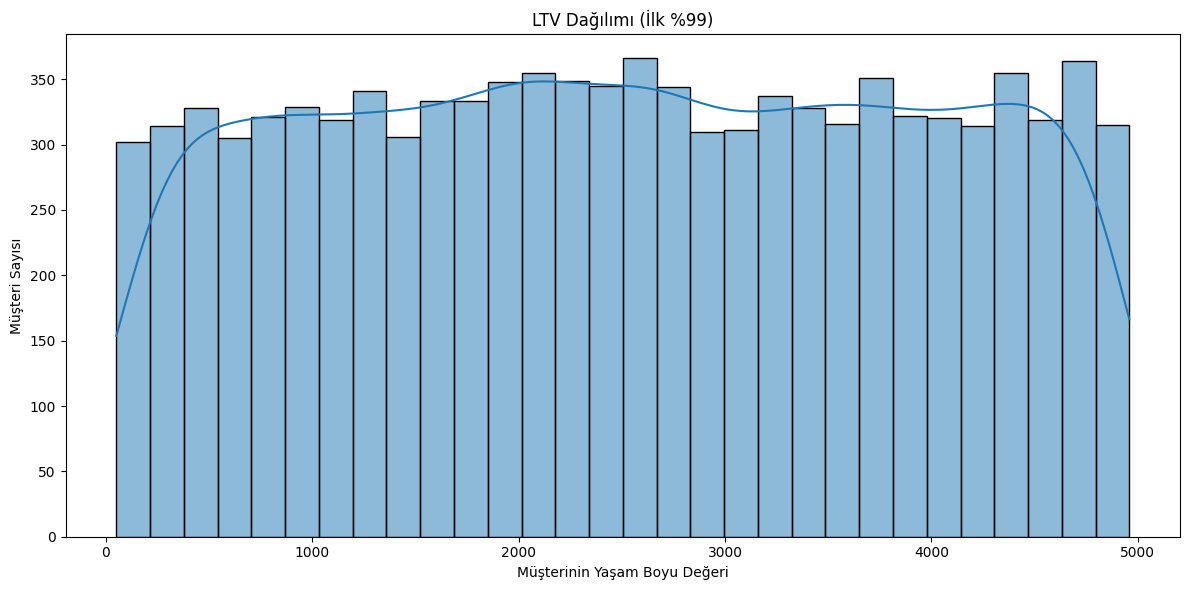

In [33]:
# Grafik 1: LTV Dağılımı
plt.figure(figsize=(12, 6))
ltv_cap = rfm_df["LTV"].quantile(0.99)
sns.histplot(rfm_df[rfm_df["LTV"] <= ltv_cap]["LTV"].dropna(), bins=30, kde=True)
plt.title("LTV Dağılımı (İlk %99)")
plt.xlabel("Müşterinin Yaşam Boyu Değeri")
plt.ylabel("Müşteri Sayısı")
plt.tight_layout()
#plt.savefig("LTV_Dagilimi.png")
plt.show()

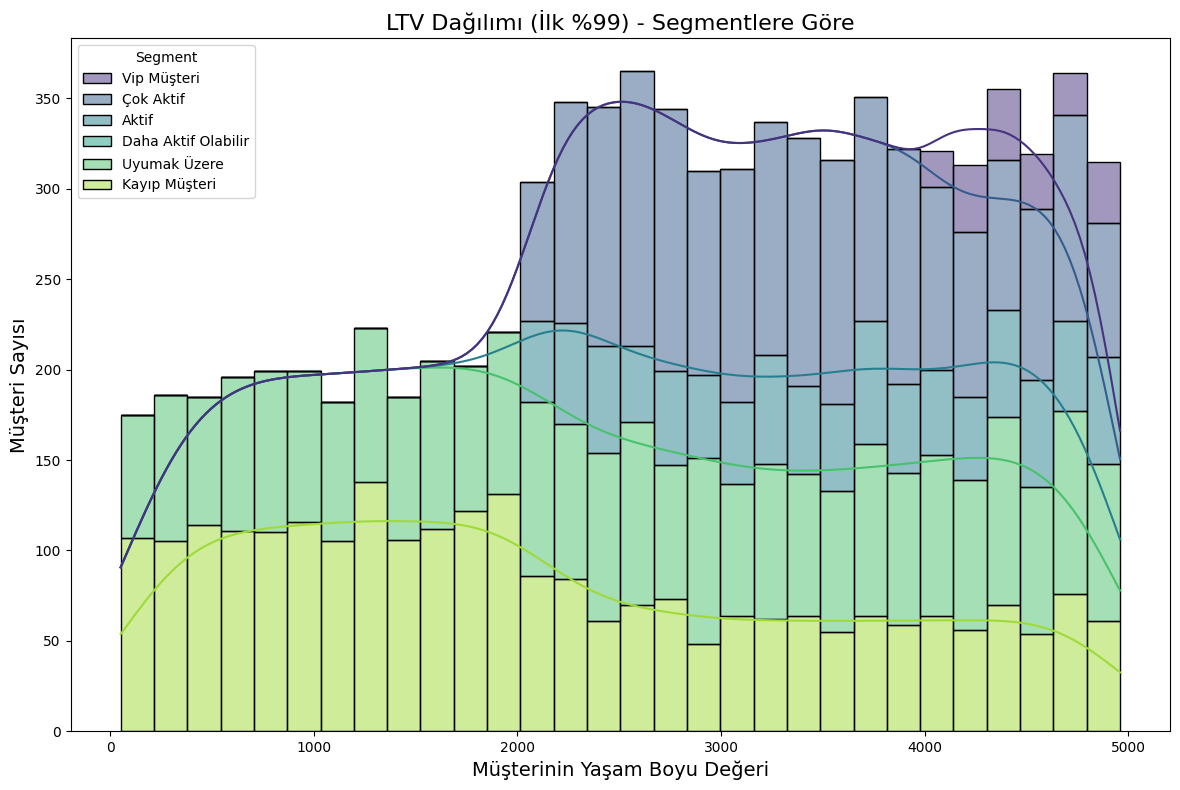

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Segment sırası
segment_sirasi = [
    'Vip Müşteri',
    'Çok Aktif',
    'Aktif',
    'Daha Aktif Olabilir',
    'Uyumak Üzere',
    'Kayıp Müşteri'
]

# Grafik
plt.figure(figsize=(14, 8))
sns.histplot(data=filtered_rfm_df, x='LTV', bins=30, kde=True,
              hue='Segment',
              hue_order=segment_sirasi,
              palette='viridis',
              multiple="stack")
plt.title("LTV Dağılımı (İlk %99) - Segmentlere Göre", fontsize=16)
plt.xlabel("Müşterinin Yaşam Boyu Değeri", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

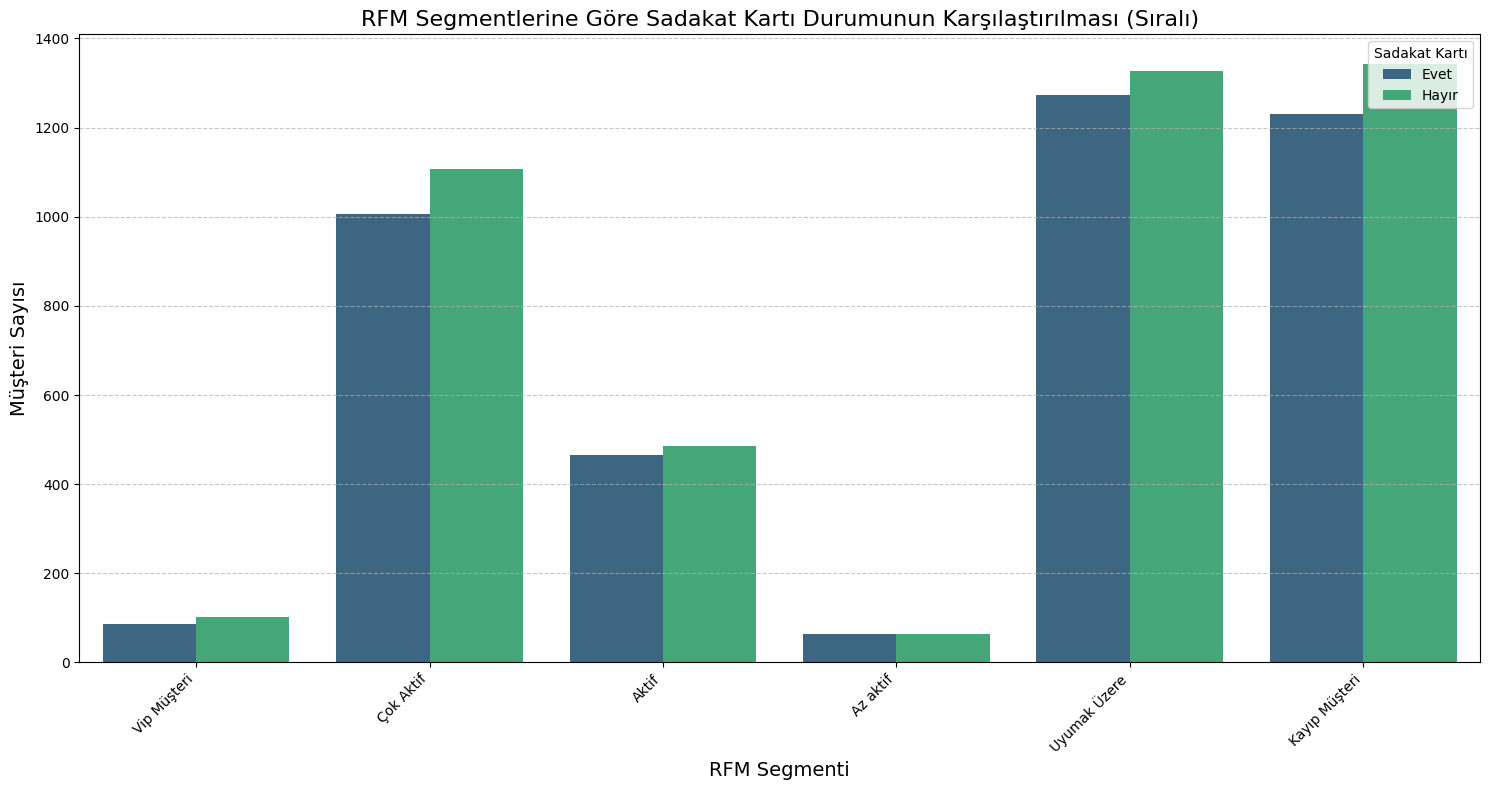

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

segment_sirasi = [
    'Vip Müşteri',
    'Çok Aktif',
    'Aktif',
    'Az aktif',
    'Uyumak Üzere',
    'Kayıp Müşteri',
]
# Segment ve Sadakat Kartı Durumuna Göre Müşteri Sayısını Hesaplama
if 'has_loyalty_card' in rfm_df.columns:
    segment_loyalty_counts = rfm_df.groupby(['Segment', 'has_loyalty_card']).size().reset_index(name='Musteri_Sayisi')
    segment_loyalty_counts['Segment'] = pd.Categorical(
        segment_loyalty_counts['Segment'],
        categories=segment_sirasi,
        ordered=True
    )
    # --- Grafik oluşturma ---
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Segment', y='Musteri_Sayisi', hue='has_loyalty_card', data=segment_loyalty_counts, palette='viridis')
    plt.title('RFM Segmentlerine Göre Sadakat Kartı Durumunun Karşılaştırılması (Sıralı)', fontsize=16)
    plt.xlabel('RFM Segmenti', fontsize=14)
    plt.ylabel('Müşteri Sayısı', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sadakat Kartı', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

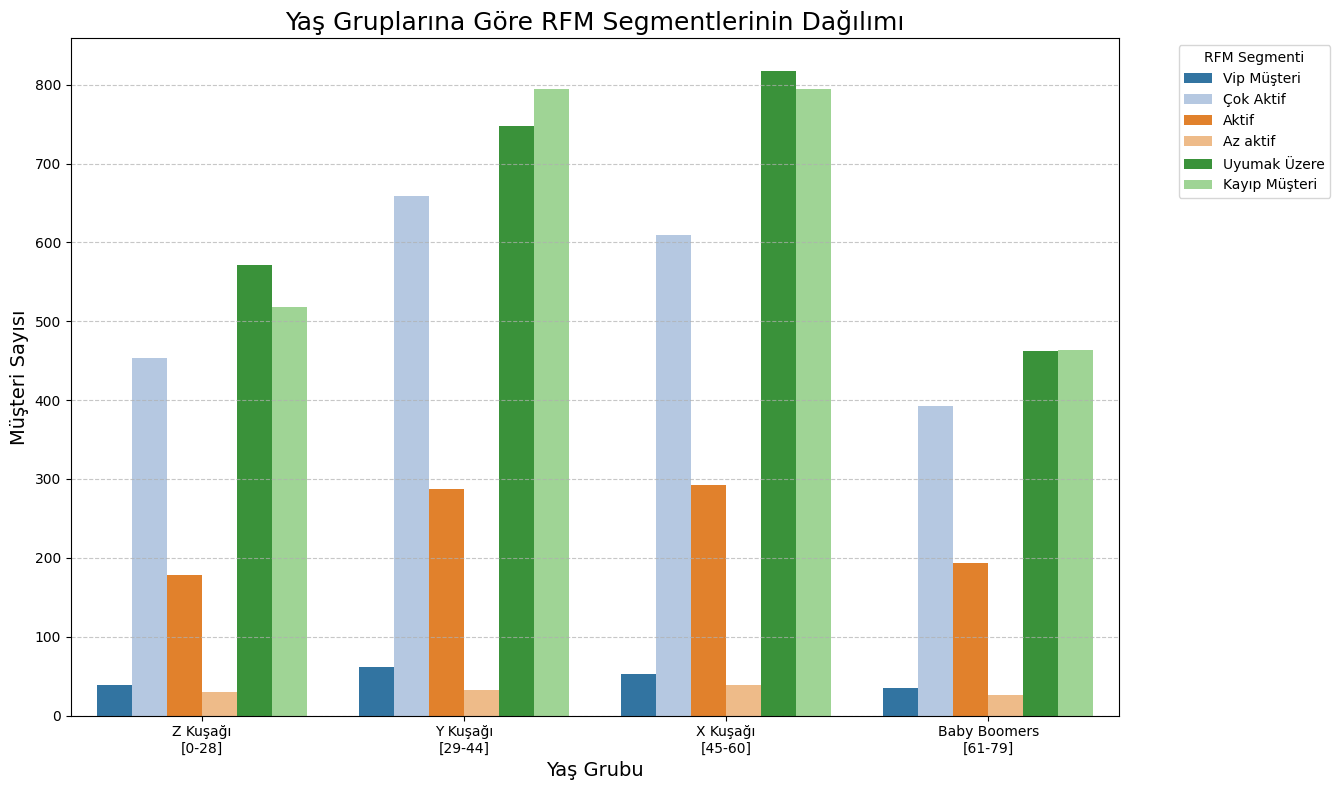

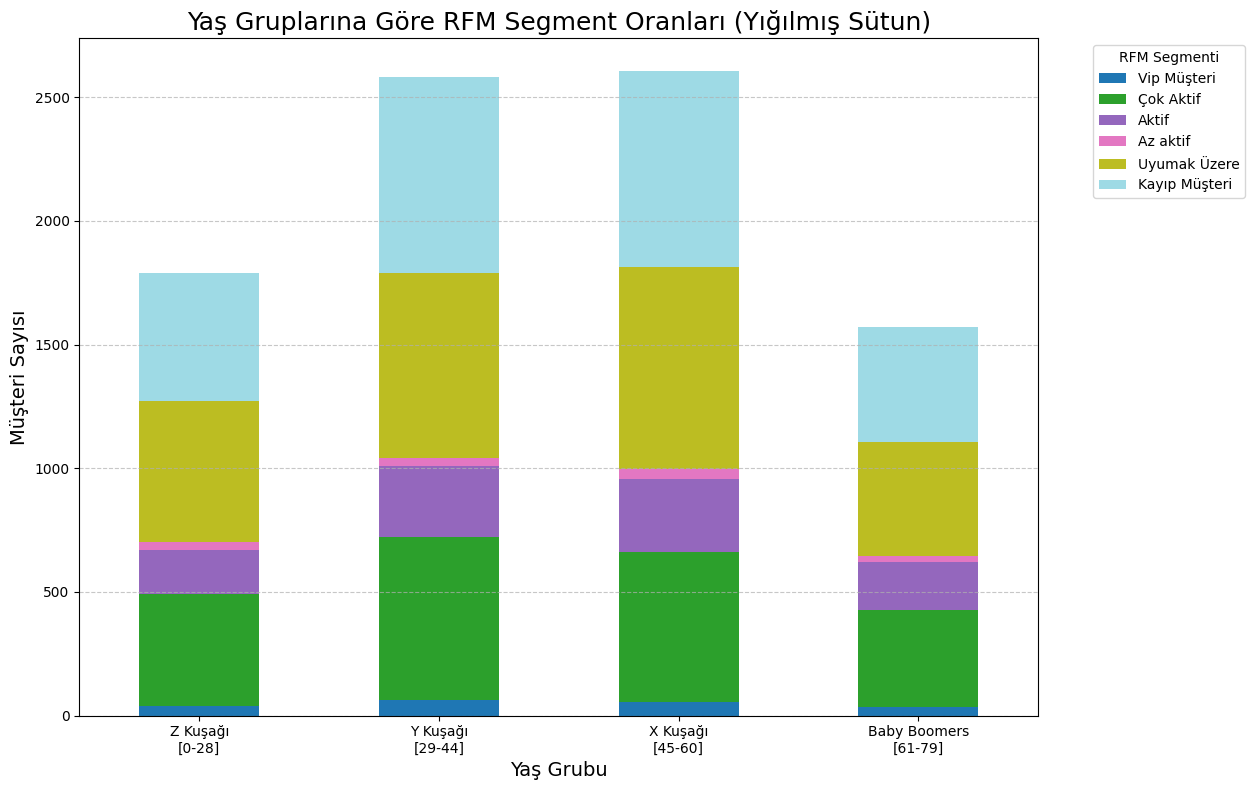

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt


today = dt.date.today()
if 'birth_date' in rfm_df.columns:
    rfm_df_age = rfm_df.dropna(subset=['birth_date']).copy()
    rfm_df_age['Yaş'] = rfm_df_age['birth_date'].apply(
        lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    )

    bins = [0, 28, 44, 60, 79] # Yaş aralıklarının bitiş noktaları (0 dahil değil)
    labels = ['Z Kuşağı\n[0-28]', 'Y Kuşağı\n[29-44]', 'X Kuşağı\n[45-60]', 'Baby Boomers\n[61-79]']
    rfm_df_age['Yaş Grubu'] = pd.cut(rfm_df_age['Yaş'], bins=bins, labels=labels, right=True, include_lowest=True)
    age_segment_counts = rfm_df_age.groupby(['Yaş Grubu', 'Segment'], observed=False).size().reset_index(name='Musteri_Sayisi')
    age_group_totals = age_segment_counts.groupby('Yaş Grubu', observed=False)['Musteri_Sayisi'].transform('sum')
    age_segment_counts['Yuzde'] = age_segment_counts['Musteri_Sayisi'] / age_group_totals * 100
    plt.figure(figsize=(16, 8))

    segment_sirasi = [
        'Vip Müşteri', 'Çok Aktif', 'Aktif', 'Az aktif',
        'Uyumak Üzere', 'Kayıp Müşteri'
    ]
     # Sadece veride bulunan segmentleri sıralama listemizde tutalım
    segments_in_data = age_segment_counts['Segment'].unique()
    ordered_segments_in_data = [seg for seg in segment_sirasi if seg in segments_in_data]


    sns.barplot(x='Yaş Grubu', y='Musteri_Sayisi', hue='Segment', data=age_segment_counts,
                palette='tab20', # Farklı segmentler için geniş renk paleti
                hue_order=ordered_segments_in_data) # Segmentlerin sıralamasını belirt
    plt.title('Yaş Gruplarına Göre RFM Segmentlerinin Dağılımı', fontsize=18)
    plt.xlabel('Yaş Grubu', fontsize=14)
    plt.ylabel('Müşteri Sayısı', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(title='RFM Segmenti', bbox_to_anchor=(1.05, 1), loc='upper left') # Lejantı dışarı al
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Lejant için sağda boşluk bırak
    plt.show()


    age_segment_pivot = age_segment_counts.pivot(index='Yaş Grubu', columns='Segment', values='Musteri_Sayisi').fillna(0)
    age_segment_pivot = age_segment_pivot[ordered_segments_in_data]
    age_segment_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')

    plt.title('Yaş Gruplarına Göre RFM Segment Oranları (Yığılmış Sütun)', fontsize=18)
    plt.xlabel('Yaş Grubu', fontsize=14)
    plt.ylabel('Müşteri Sayısı', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(title='RFM Segmenti', bbox_to_anchor=(1.05, 1), loc='upper left') # Lejantı dışarıda
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Lejant için sağda boşluk olsun
    plt.show()


else:
    print("\nHata: 'birth_date' sütunu rfm_df DataFrame'inde bulunamadı.")
    print("Mevcut sütunlar:", rfm_df.columns)

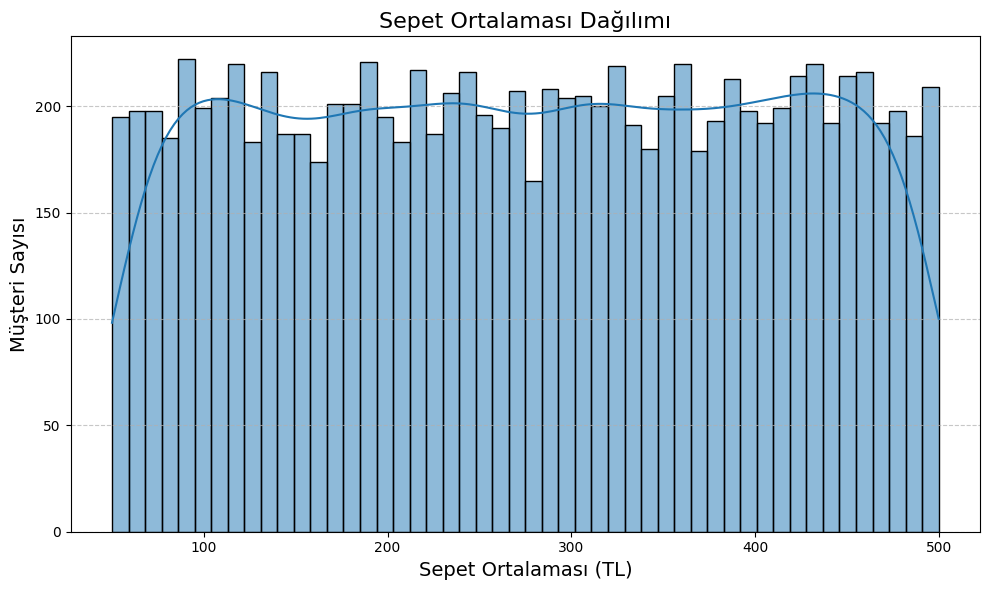

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grafik oluşturma (Histogram)
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarla
sns.histplot(data=rfm_df, x='avg_basket_size', bins=50, kde=True)
plt.title('Sepet Ortalaması Dağılımı', fontsize=16)
plt.xlabel('Sepet Ortalaması (TL)', fontsize=14)
plt.ylabel('Müşteri Sayısı', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-42-f2338b0bf532>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Ortalama_Sepet_Buyuklugu', data=segment_avg_basket, palette='viridis')


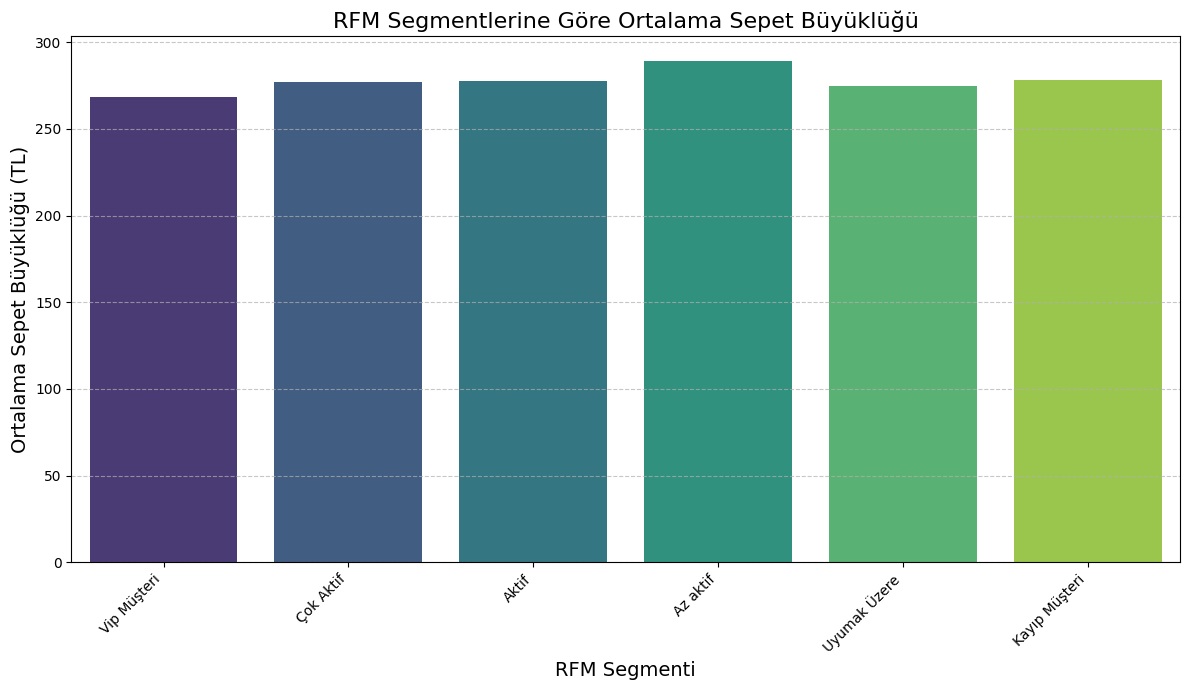

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# İstenen segment sırasını tanımla
segment_sirasi = [
    'Vip Müşteri',
    'Çok Aktif',
    'Aktif',
    'Az aktif',
    'Uyumak Üzere',
    'Kayıp Müşteri'
]


# Segmentlere göre avg_basket_size ortalamasını hesapla
segment_avg_basket = rfm_df.groupby('Segment')['avg_basket_size'].mean().reset_index()
segment_avg_basket.columns = ['Segment', 'Ortalama_Sepet_Buyuklugu']
segment_avg_basket['Segment'] = pd.Categorical(
    segment_avg_basket['Segment'],
    categories=segment_sirasi,
    ordered=True
)

# Sıralamayı uyguladıktan sonra NaN değerleri (veride olmayan segmentler) düşürebiliriz
segment_avg_basket = segment_avg_basket.dropna(subset=['Segment'])

# Grafik
plt.figure(figsize=(12, 7))
sns.barplot(x='Segment', y='Ortalama_Sepet_Buyuklugu', data=segment_avg_basket, palette='viridis')
plt.title('RFM Segmentlerine Göre Ortalama Sepet Büyüklüğü', fontsize=16)
plt.xlabel('RFM Segmenti', fontsize=14)
plt.ylabel('Ortalama Sepet Büyüklüğü (TL)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

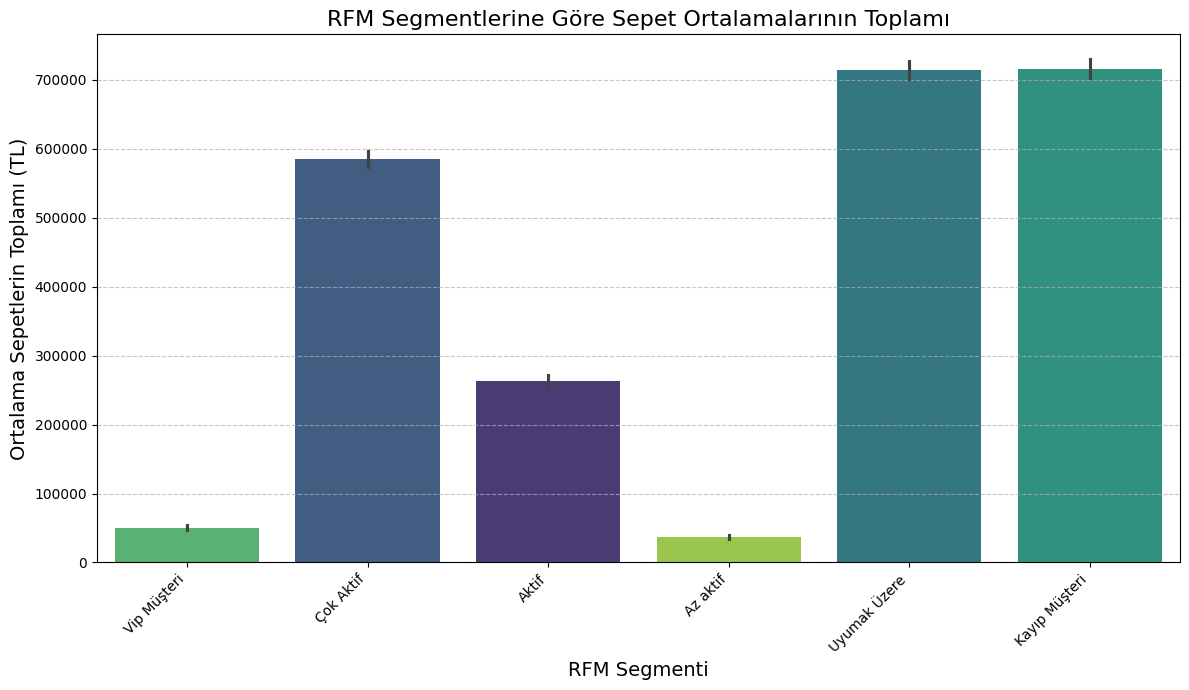

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

segment_sirasi = [
    'Vip Müşteri',
    'Çok Aktif',
    'Aktif',
    'Az aktif',
    'Uyumak Üzere',
    'Kayıp Müşteri'
]

# Grafik oluşturma
plt.figure(figsize=(12, 7))
sns.barplot(x='Segment', y='avg_basket_size', data=rfm_df,
            hue='Segment',
            estimator=sum,  # Her segment için toplamı hesapla
            order=segment_sirasi, # Belirtilen sıraya göre
            palette='viridis',
            legend=False)

plt.title('RFM Segmentlerine Göre Sepet Ortalamalarının Toplamı', fontsize=16)
plt.xlabel('RFM Segmenti', fontsize=14)
plt.ylabel('Ortalama Sepetlerin Toplamı (TL)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-69-f534049e56f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Yaş Grubu', y='Ortalama_Sepet_Buyuklugu', data=age_avg_basket, palette='viridis')


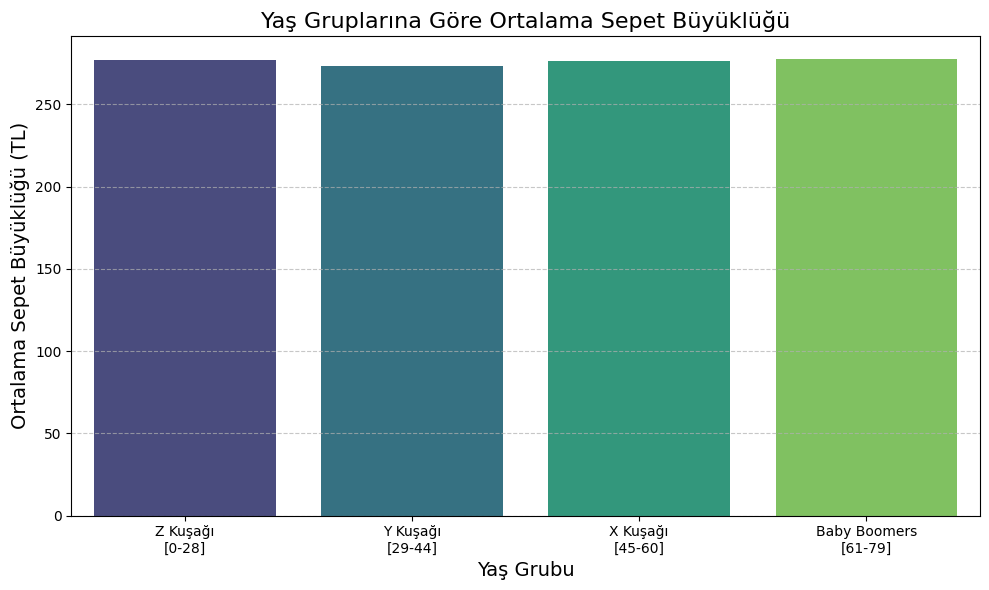

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

# Grafik oluşturma (Sütun Grafiği)
plt.figure(figsize=(10, 6))
sns.barplot(x='Yaş Grubu', y='Ortalama_Sepet_Buyuklugu', data=age_avg_basket, palette='viridis')
plt.title('Yaş Gruplarına Göre Ortalama Sepet Büyüklüğü', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=14)
plt.ylabel('Ortalama Sepet Büyüklüğü (TL)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()